In [2]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm   # type: ignore
import arviz as az   # type: ignore

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
data = pd.read_csv("EPE.csv")

##  `Image` saves the code of each of the 2221 eggs. The number before the hyphen represents the species code, and the number after the hyphen represents the individual code of an egg. 
# 1 and 2 represent Anas platyrhynchos domesticus, and Anser cygnoides domesticus; 5, 3, 4 and 7 represent Alectoris chukar domesticus, Coturnix japonica domesticus, Gallus gallus domesticus, and Phasianus colchicus domesticus.

# Add a column `Species` with the latin name of the species who produced the egg (see the description on the `Image` column of data).

#data[" Sepcie Code"], data["Individual Code"]= data['Image'].str.split('-', expand=True) 
data


,Image,scan.length,scan.width,scan.area,Albumen,Yolk,Shell
0,1-001,6.221473,4.540429,22.110017,41.3945,29.6658,8.4415
1,1-002,6.621715,4.163546,21.447135,37.1113,25.8654,8.1418
2,1-003,6.344160,4.528604,22.326449,42.9508,29.7898,8.1596
3,1-004,6.017742,4.563903,21.550142,39.4268,28.8630,7.9317
4,1-005,6.001429,4.403663,20.631756,40.9513,24.9595,7.8770
...,...,...,...,...,...,...,...
2216,7-385,4.500965,3.354001,11.573268,NaN,NaN,NaN
2217,7-386,4.372292,3.389678,11.269988,NaN,NaN,NaN
2218,7-387,4.421552,3.385283,11.417075,NaN,NaN,NaN
2219,7-389,4.180517,3.346545,10.691421,NaN,NaN,NaN


In [4]:
first = data["Image"][0:350]
second= data["Image"][351:711]
third = data["Image"][711:1087]
firth = data["Image"][1087:1464]
fifth = data["Image"][1464:1854] 
seventh = data["Image"][1854:]

for i in first:
    data.loc[data.Image== i, 'Specie'] = "Anas platyrhynchos domesticus"  #COOL but to fix 
for i in second:
    data.loc[data.Image== i, 'Specie'] = "Anser cygnoides domesticus" 
for i in third:
    data.loc[data.Image== i, 'Specie'] = "Coturnix japonica domesticus" 
for i in firth:
    data.loc[data.Image== i, 'Specie'] = "Gallus gallus domesticus" 
for i in fifth:
    data.loc[data.Image== i, 'Specie'] = "Alectoris chukar domesticus" 
for i in seventh:
    data.loc[data.Image== i, 'Specie'] = "Phasianus colchicus domesticus" 
data

,Image,scan.length,scan.width,scan.area,Albumen,Yolk,Shell,Specie
0,1-001,6.221473,4.540429,22.110017,41.3945,29.6658,8.4415,Anas platyrhynchos domesticus
1,1-002,6.621715,4.163546,21.447135,37.1113,25.8654,8.1418,Anas platyrhynchos domesticus
2,1-003,6.344160,4.528604,22.326449,42.9508,29.7898,8.1596,Anas platyrhynchos domesticus
3,1-004,6.017742,4.563903,21.550142,39.4268,28.8630,7.9317,Anas platyrhynchos domesticus
4,1-005,6.001429,4.403663,20.631756,40.9513,24.9595,7.8770,Anas platyrhynchos domesticus
...,...,...,...,...,...,...,...,...
2216,7-385,4.500965,3.354001,11.573268,NaN,NaN,NaN,Phasianus colchicus domesticus
2217,7-386,4.372292,3.389678,11.269988,NaN,NaN,NaN,Phasianus colchicus domesticus
2218,7-387,4.421552,3.385283,11.417075,NaN,NaN,NaN,Phasianus colchicus domesticus
2219,7-389,4.180517,3.346545,10.691421,NaN,NaN,NaN,Phasianus colchicus domesticus


In [5]:
### Exercise 3 

def ellipsoid_volume(a:int,b:int ,c:int ) -> float :
    V= 4/3 * np.pi * a*b*c
    return V

### Exercise 4 

def orthogonal (colb:int, colc:int) -> float:
    x= np.pi *colb/colc 
    return x 

data["x"]= data.apply(lambda x: orthogonal(x["scan.width"], x["scan.area"]), axis= 1)  #USEFUL: apply fun to multiple cols 

### Exercise 5 (max 5 points)

data['max'] = data[["scan.length","scan.width","x"]].max(axis=1)   #double brakets!! 
data

,Image,scan.length,scan.width,scan.area,Albumen,Yolk,Shell,Specie,x,max
0,1-001,6.221473,4.540429,22.110017,41.3945,29.6658,8.4415,Anas platyrhynchos domesticus,0.645145,6.221473
1,1-002,6.621715,4.163546,21.447135,37.1113,25.8654,8.1418,Anas platyrhynchos domesticus,0.609879,6.621715
2,1-003,6.344160,4.528604,22.326449,42.9508,29.7898,8.1596,Anas platyrhynchos domesticus,0.637228,6.344160
3,1-004,6.017742,4.563903,21.550142,39.4268,28.8630,7.9317,Anas platyrhynchos domesticus,0.665329,6.017742
4,1-005,6.001429,4.403663,20.631756,40.9513,24.9595,7.8770,Anas platyrhynchos domesticus,0.670545,6.001429
...,...,...,...,...,...,...,...,...,...,...
2216,7-385,4.500965,3.354001,11.573268,NaN,NaN,NaN,Phasianus colchicus domesticus,0.910452,4.500965
2217,7-386,4.372292,3.389678,11.269988,NaN,NaN,NaN,Phasianus colchicus domesticus,0.944898,4.372292
2218,7-387,4.421552,3.385283,11.417075,NaN,NaN,NaN,Phasianus colchicus domesticus,0.931515,4.421552
2219,7-389,4.180517,3.346545,10.691421,NaN,NaN,NaN,Phasianus colchicus domesticus,0.983357,4.180517


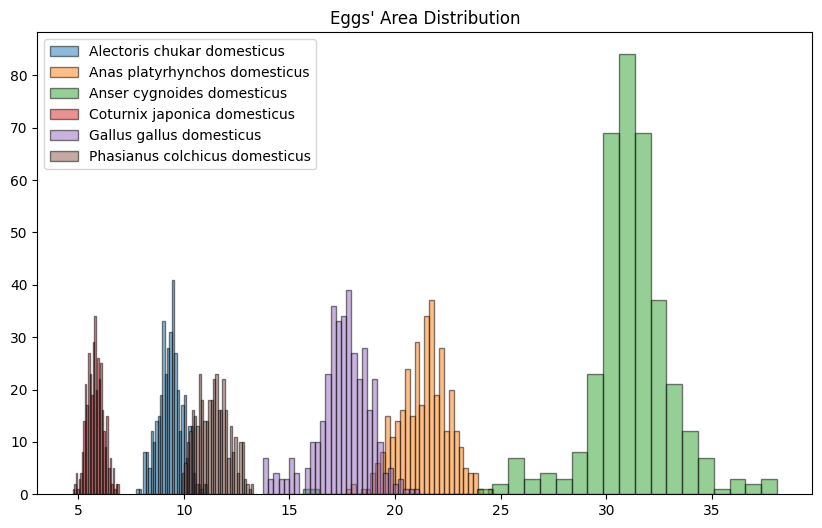

In [10]:
### Exercise 6 (max 5 points)
# Plot together the histograms of `scan.area` for each species.

specie= data.groupby( "Specie")
plt.figure(figsize=(10, 6))

for (name, group) in specie:
    plt.hist(group['scan.area'], bins=30, alpha=0.5, label=name, edgecolor="black")   #USEFUL
    plt.legend()
    plt.title("Eggs' Area Distribution")


#maio